# Main Models - Project 3

In [1]:
# Import Basics
import numpy as np
import pandas as pd

#Import Visuals
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Import Linear Regression Algorithms
from sklearn.linear_model import LinearRegression, Lasso, LassoCV ,Ridge, ElasticNet, LogisticRegression, RidgeCV
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# Import Optimization algorithms
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.svm import SVR

# Import Data Processing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, PowerTransformer, PolynomialFeatures

from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector


from sklearn.naive_bayes import MultinomialNB

# NPL 
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction import text

#scrapping 
import json

#Import graphical user info
from sklearn import set_config

# Metrics
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

### Data Input - from clean data

In [2]:
df = pd.read_csv('../clean_data/clean_data.csv')
df.sample(10)

,title,selftext,subreddit,author,max_text
4534,my gf wants to binge watch the entire series w...,[removed]\n\n[view poll](https://www.reddit.co...,starwars,tox1cZach,my gf wants to binge watch the entire series w...
2842,what black armoured characters droids or vehic...,"hi guys! \n\n\nim struggling to think here, a...",starwars,Carnifekt,what black armoured characters droids or vehic...
2349,is vader turning good a subversion of expectat...,i only think it is because i felt most people ...,starwars,LordUhtredRagnarsson,is vader turning good a subversion of expectat...
10329,but why???,wtf was with the sudden relationship between 7...,startrek,Sec31,but why??? wtf was with the sudden relationshi...
519,who is cuter baby yoda or baby groot?,[removed]\n\n[view poll](https://www.reddit.co...,starwars,Cat_Scat500,who is cuter baby yoda or baby groot? [removed...
5890,james bond uses lcars,re-watching the daniel craig era bond films ah...,startrek,CestrianCFC,james bond uses lcars re-watching the daniel c...
2872,watching order that don't spoil - contains spo...,try to fill in the shoes of someone that has n...,starwars,Guigui_LB,watching order that don't spoil - contains spo...
7540,long time star trek fan finally watches voyage...,i meant to start this quite awhile ago but the...,startrek,MrPotato2753,long time star trek fan finally watches voyage...
11089,"i know i’ll probably get hate for this, but ab...",the new enterprise a bridge bugs me a bit. it’...,startrek,NewWaveFreak,"i know i’ll probably get hate for this, but ab..."
6803,season 1 crusher is better than seasons 3-7 cr...,but pulaski is still the best,startrek,CaptainDipshiat,season 1 crusher is better than seasons 3-7 cr...


#### Functions

---

In [3]:
# Lemmatize function to be run 

def the_lem(text):
    text = text.lower()
    lem = WordNetLemmatizer()
    return ' '.join([lem.lemmatize(word) for word in text.split()])

#### Appending  stop words

In [4]:
"""
    Based on the top 100 most common words that where discoved through
        EDA after running the basic models, we have choosen words to be 
        added to the stopword list and therefore be removed. This should 
        allow more relevent words to float to the top.
"""

'\n    Based on the top 100 most common words that where discoved through\n        EDA after running the basic models, we have choosen words to be \n        added to the stopword list and therefore be removed. This should \n        allow more relevent words to float to the top.\n'

In [38]:
my_stop_words = text.ENGLISH_STOP_WORDS.union(['http' , 'com', 've', 'www',
                                               'reddit', ])#'subreddit!', 'subreddit',,'https'
                                               

In [6]:
# lemmatize stop words

my_stop_words_lem = []
for x in my_stop_words:
    my_stop_words_lem.append(the_lem(x))
    

## Create X & y 

#### (using a random .sample() to run test before running all the data)

---

In [7]:
df_sample = df.sample(2500).copy()

In [8]:
# --- _sample
X = df['max_text']
X.shape

(11720,)

In [9]:
# 1 = Starwars -- _sample
y = np.where(df['subreddit'] == 'starwars', 1, 0)
y.shape

(11720,)

In [10]:
# Checking y
np.unique(y)

array([0, 1])

#### Train test split 

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify =y , random_state = 8936) #8936

### Baseline Accuracy

- According to our inputed data our null / baseline Accuracy is 51%
- If we where to randomly pull a sample there is a 51% chance that it will be a StarWars subreddit 

In [12]:
1- y_train.sum()/len(y_train)

0.5126279863481229

##  Muli-Nomial Bayes Model - Gridsearch 

---

#### Vectorizers & Estimators 

In [13]:
cvect = CountVectorizer()
tfidf = TfidfVectorizer()

nbayes = MultinomialNB()

#### Pipeslines

In [14]:
cvect_nbayes = make_pipeline(cvect, nbayes)
tfidf_nbayes = make_pipeline(tfidf, nbayes)



#### Params

In [35]:
params = {
         'countvectorizer__max_features': [5000],
         'countvectorizer__ngram_range': [(1,1),(1,2)],
         'countvectorizer__min_df': [10],
         #'countvectorizer__max_df': [0.5, 0.8, .9],
         'countvectorizer__lowercase':[True],
         'multinomialnb__alpha': [1e-1],
         'countvectorizer__preprocessor':[the_lem],
         'countvectorizer__stop_words':[my_stop_words_lem],
         }

#### Grid Search CV 

In [36]:
grid_bayes = GridSearchCV(cvect_nbayes, param_grid=params, n_jobs=-1)

In [39]:
%time
grid_bayes.fit(X_train, y_train)

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 10 µs


GridSearchCV(estimator=Pipeline(steps=[('countvectorizer', CountVectorizer()),
                                       ('multinomialnb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'countvectorizer__lowercase': [True],
                         'countvectorizer__max_features': [5000],
                         'countvectorizer__min_df': [10],
                         'countvectorizer__ngram_range': [(1, 1), (1, 2)],
                         'countvectorizer__preprocessor': [<function the_lem at 0x12df50a60>],
                         'countvectorizer__stop_words': [['ourselves', 'last',
                                                          'we', 'everything',
                                                          'everyone', 'whereby',
                                                          'whoever', 'upon',
                                                          'show', 'even',
                                                          'twenty', 'where

--- 

### Accuracy Scores

In [40]:
grid_bayes.score(X_train, y_train)

0.9824800910125142

In [41]:
grid_bayes.score(X_test, y_test)

0.9771331058020478

### Best Params

In [42]:
grid_bayes.best_params_

{'countvectorizer__lowercase': True,
 'countvectorizer__max_features': 5000,
 'countvectorizer__min_df': 10,
 'countvectorizer__ngram_range': (1, 2),
 'countvectorizer__preprocessor': <function __main__.the_lem(text)>,
 'countvectorizer__stop_words': ['ourselves',
  'last',
  'we',
  'everything',
  'everyone',
  'whereby',
  'whoever',
  'upon',
  'show',
  'even',
  'twenty',
  'whereupon',
  'made',
  'where',
  'whenever',
  'cannot',
  'interest',
  'our',
  'detail',
  'see',
  'u',
  'via',
  'down',
  'herself',
  'themselves',
  'with',
  'latter',
  'one',
  'ours',
  'per',
  'these',
  'myself',
  'afterwards',
  'not',
  'beforehand',
  'first',
  'becoming',
  'through',
  'a',
  'along',
  'must',
  'mine',
  'sixty',
  'fifty',
  'moreover',
  'become',
  'something',
  'if',
  'out',
  'much',
  'whereafter',
  'may',
  'beyond',
  'since',
  'anyway',
  'for',
  'reddit',
  'also',
  'give',
  'your',
  'ie',
  'now',
  'might',
  've',
  'that',
  'be',
  'some',
  '

In [43]:
## Best Params

"""
multinomialnb__alpha': 0.01
countvectorizer__lowercase': True,
countvectorizer__max_df': 0.5,
countvectorizer__max_features': 5000,
countvectorizer__min_df': 6,
countvectorizer__ngram_range': (1, 2)
"""


"\nmultinomialnb__alpha': 0.01\ncountvectorizer__lowercase': True,\ncountvectorizer__max_df': 0.5,\ncountvectorizer__max_features': 5000,\ncountvectorizer__min_df': 6,\ncountvectorizer__ngram_range': (1, 2)\n"

#### Create Predict

In [44]:
y_preds = grid_bayes.predict(X_test)

#### Accuracy Score

In [45]:
accuracy_score(y_test, y_preds)

0.9771331058020478

#### Precision Score

In [46]:
precision_score(y_test, y_preds)

0.9906272530641672

#### Graph of scores

In [49]:
precision = precision_score(y_test, y_preds)*100
accuracy = accuracy_score(y_test, y_preds)*100
score = grid_bayes.score(X_test, y_test)*100

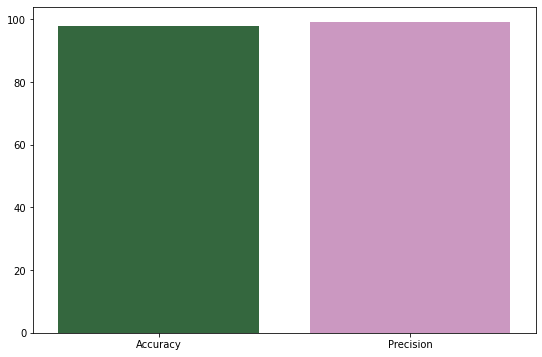

In [52]:

plt.figure(figsize = (9,6))
ax = sns.barplot(x = ['Accuracy','Precision'],
            y = [score,precision], 
            #hue =['StarWars','StarWars','StarTrek','StarTrek'],
            palette='cubehelix');


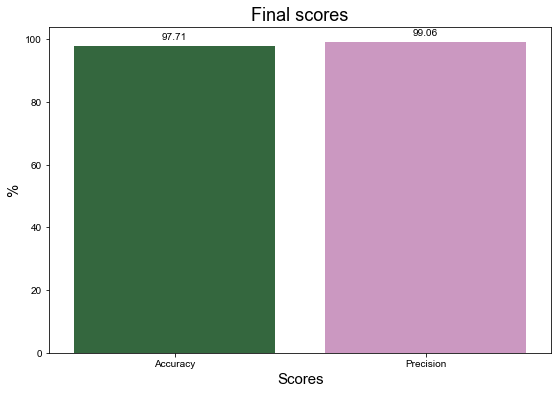

In [53]:

plt.figure(figsize = (9,6))
ax = sns.barplot(x = ['Accuracy', 'Precision'],
            y = [score,precision], 
            #hue =['StarWars','StarWars','StarTrek','StarTrek'],
            palette='cubehelix');

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                  (p.get_x()+ p.get_width() / 2., p.get_height()),
                  ha = 'center', va = 'center',
                  xytext = (0,9),
                  textcoords = 'offset points')
sns.set_style("dark")
plt.xlabel("Scores", size=15)
plt.ylabel("%", size=15)
plt.title("Final scores", size=18)
plt.savefig("../clean_data/final_scores", dpi=100);


#### Create confusion Matrix

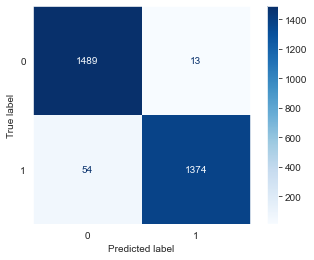

In [54]:
plot_confusion_matrix(grid_bayes, X_test, y_test, cmap='Blues', values_format='d');

In [55]:
# Calculate the specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_preds).ravel()

In [56]:
tn

1489

In [57]:
fp

13

In [58]:
fn

54

In [59]:
tp

1374

#### Create DF for most popular Word

In [67]:
feature_names = grid_bayes.best_estimator_.named_steps['countvectorizer'].get_feature_names()

In [68]:
vectored_data =grid_bayes.best_estimator_.named_steps['countvectorizer'].transform(X_train)

In [69]:
cvect_X_train_df = pd.DataFrame(vectored_data.toarray(), columns=feature_names)

In [70]:
grid_bayes.best_estimator_.named_steps['countvectorizer']

CountVectorizer(max_features=5000, min_df=10, ngram_range=(1, 2),
                preprocessor=<function the_lem at 0x12df50a60>,
                stop_words=['ourselves', 'last', 'we', 'everything', 'everyone',
                            'whereby', 'whoever', 'upon', 'show', 'even',
                            'twenty', 'whereupon', 'made', 'where', 'whenever',
                            'cannot', 'interest', 'our', 'detail', 'see', 'u',
                            'via', 'down', 'herself', 'themselves', 'with',
                            'latter', 'one', 'ours', 'per', ...])

In [72]:
cvect_X_train_df

,00,000,01,03,05,07,08,09,10,10 year,...,younglings,youth,youtu,youtube,youtube channel,youtube video,youtube watch,zahn,zero,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8786,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
8787,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8788,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
# Creaticvect_X_train_dfng top word use DataFrame for graphs

cvect_X_train_df['reddit'] = y_train

In [74]:
cvect_X_train_df.groupby('reddit').sum().T

reddit,0,1
00,27,1
000,27,41
01,33,6
03,12,8
05,16,9
...,...,...
youtube video,6,10
youtube watch,117,120
zahn,0,17
zero,35,12


In [75]:
most_common_word = cvect_X_train_df.groupby('reddit').sum().T
most_common_words = most_common_word.copy()
most_common_words[0]  = most_common_words[0] * -1

In [76]:
# checking for extra stop words 
#

# most_common_word.nlargest(99, 1)

In [77]:
most_common_word.nlargest(25, 1)

reddit,0,1
war,427,3102
star,3464,2976
like,2748,2461
clone,30,2344
just,2840,2295
jedi,3,2157
star war,67,2148
anakin,0,1573
force,96,1506
know,1381,1417


--- 

In [78]:
most_common_wordss = most_common_words.reset_index()
# most_common_wordss

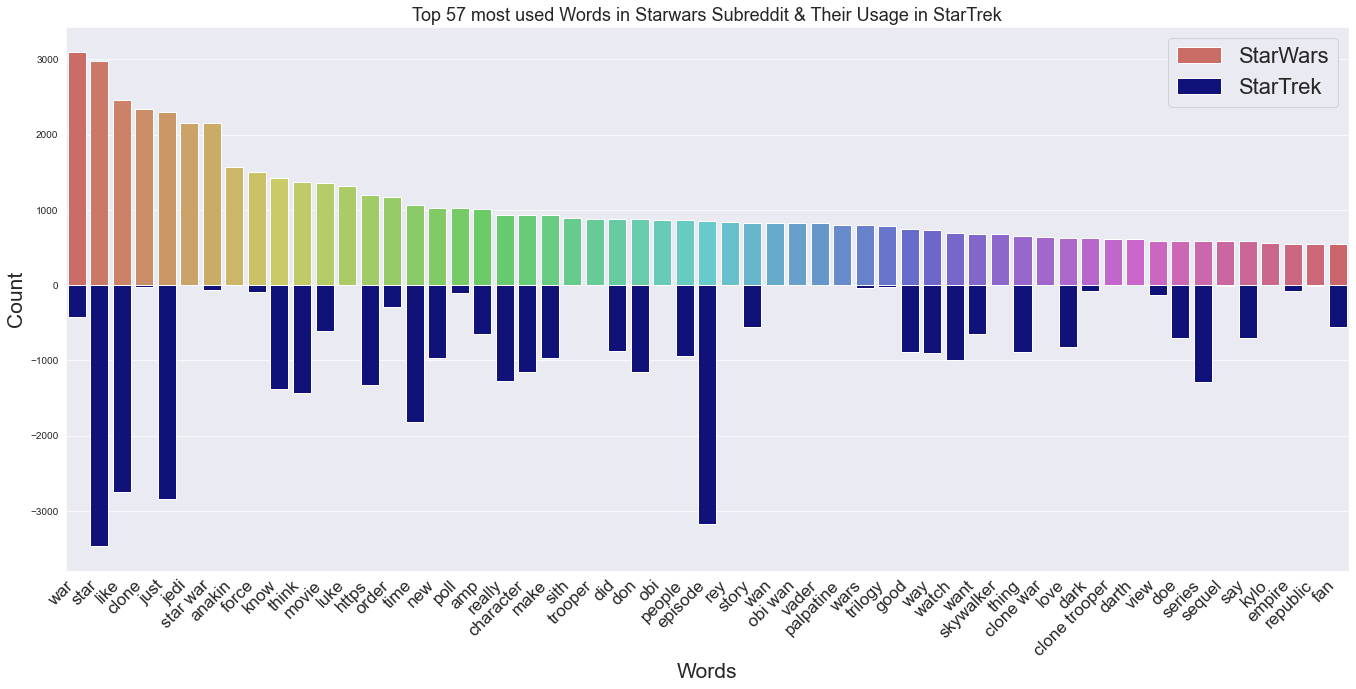

In [81]:
plt.figure(figsize=(23,10))
sns.set_style("darkgrid")
words = sns.barplot(data=most_common_wordss.nlargest(57, 1), x='index',
                    y=1, ci = 0, label = 'StarWars' , palette = 'hls' )
words = sns.barplot(data=most_common_wordss.nlargest(57, 1), x='index',
                    y=0, ci = 0, color = 'darkblue', label ='StarTrek' )

words.set_xticklabels(words.get_xticklabels(), rotation=45, horizontalalignment='right', size = 17);

plt.xlabel("Words", size=21)
plt.ylabel("Count", size=21)
plt.title("Top 57 most used Words in Starwars Subreddit & Their Usage in StarTrek", size=18)
plt.savefig("../clean_data/words2", dpi=100);
plt.legend(fontsize = '22');